In [12]:
# This library is used for structured data operations, like import CSV files, create data frames, and data preparation
import pandas as pd
#This is a mathematical library. Has a powerful N-dimensional array object, linear algebra, Fourier transform, etc.
import numpy as np
#This library is used for visualization of data.
import matplotlib.pyplot as plt
#The Simple Imputer class from sklearn.impute is a useful tool for handling missing values in datasets.
from sklearn.impute import SimpleImputer
#This library os used for statistical graphics. It builds on top of matplotlib and integrates closely with pandas DS
import seaborn as sns
#This library os used for probabilistic distributions and statistical operations.
import scipy.stats as stats
from scipy.stats import spearmanr
#This library for various dimensionality reduction techniques.
from sklearn.decomposition import PCA
#Tools for data preprocessing and feature engineering
from sklearn.preprocessing import StandardScaler,LabelEncoder
#This library includes a variety of linear models for regression and classification tasks.
from sklearn.linear_model import LinearRegression,LogisticRegression,Ridge,Lasso
#This library includes tools for building decision tree models for both classification and regression tasks
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
#This library includes a range of ensemble learning methods that combine multiple individual models to improve predictive
# performance and robustness.
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
#This library provides a variety of algorithms for Support Vector Machines (SVMs) and related techniques.
from sklearn.svm import SVC
#This library provides implementations of several Naive Bayes algorithms for classification tasks.
from sklearn.naive_bayes import GaussianNB
#This library provides a range of tools for model selection, evaluation, and hyperparameter tuning
from sklearn.model_selection import train_test_split,GridSearchCV
#This library provides a variety of functions and classes to evaluate the performance of machine learning models.
from sklearn.metrics import  mean_squared_error,confusion_matrix,accuracy_score, classification_report
#This libraryprovides tools for analyzing and handling seasonal components in time series data.
from statsmodels.tsa.seasonal import seasonal_decompose
#This library provides tools for fitting and forecasting ARIMA (AutoRegressive Integrated Moving Average) models,
# which are widely used for time series forecasting.
from statsmodels.tsa.arima.model import ARIMA


In [13]:

import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore",category = DeprecationWarning)


file_path = '/kaggle/input/statistical-performance-indicators-spis/SPI_index_2018-22.csv'  # Update this with the correct file path
df = pd.read_csv(file_path)

In [14]:

#To compute the total number of missing values in the data frame.
print(df.isnull().sum())

#To handle the null value SimpleImputer is done as a part of data pre processing

# Identify numerical columns for handling missing value
numerical_columns = df.select_dtypes(include=['number']).columns

#SimpleImputer is For handling the missing data in the predictive model dataset.It replaces the NaN values with a
# specified placeholder
imputer =SimpleImputer(missing_values=np.nan,strategy='most_frequent')
numerical_columns_df=pd.DataFrame(imputer.fit_transform(df[numerical_columns]),columns=numerical_columns)

# Identify categorical columns and convert it into date frame
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns_df=pd.DataFrame(df[categorical_columns],columns=categorical_columns)

df=pd.concat([numerical_columns_df,categorical_columns_df],axis=1)
df['year'] = df['year'].astype(int)

# To check  the total number of missing values in the data frame after simple imputer.
print(df.isnull().sum())

country                                                                                                  0
iso3c                                                                                                    0
year                                                                                                     0
Pillar 1  - Data Use - Score                                                                             0
Pillar 2 - Data Services - Score                                                                       184
                                                                                                      ... 
Dimension 5.5: Finance - Finance Indicator based on PARIS21 indicators on SDG 17.18.3 & SDG 17.19.1    413
income                                                                                                   0
region                                                                                                   0
weights                              

In [15]:
""".................................................Descriptive and Exploratory Data Analysis........................................"""
# Exploratory Data Analysis (EDA) is a crucial step in data science and machine learning that involves analyzing datasets.
# EDA is to summarize their main characteristics and uncover patterns, anomalies, or relationships.

#Returns descriptive statistics about the data like mean, minimum, maximum, standard deviation, etc.
print("Descriptive Statistics of the Data Frame:","\n",df.describe())

#info() is used to generate the summary of the Data Frame, this will include info about columns with their names,
#their datatypes, and missing values.
print("Generate the summary of the Data Frame:")
print(df.info())

#df.shape() display Total no of rows and columns data frame
print("Total no of rows and columns Data Frame:",df.shape)

#It returns all the unique values of all columns
unique_values = df[['year', 'income', 'region']].apply(pd.Series.unique)
print('Unique values for each column:',"\n",unique_values)

#Returns the number of unique values of all columns
num_unique_values = df[['year', 'income', 'region']].nunique()
print('Number of unique values for each column:',"\n",num_unique_values)

#Return the memory usage of each column in bytes.
print("Memory Usage of each column in bytes:","\n",df.memory_usage(index=True, deep=True))


Descriptive Statistics of the Data Frame: 
               year  Pillar 1  - Data Use - Score  \
count  1088.000000                   1088.000000   
mean   2019.997243                     77.265074   
std       1.414536                     22.620957   
min    2018.000000                      0.000000   
25%    2019.000000                     60.000000   
50%    2020.000000                     80.000000   
75%    2021.000000                    100.000000   
max    2022.000000                    100.000000   

       Pillar 2 - Data Services - Score  Pillar 3 - Data Products - Score  \
count                       1088.000000                       1088.000000   
mean                          67.480882                         63.474069   
std                           19.001015                         19.756540   
min                            0.466667                          6.418750   
25%                           59.900000                         53.326562   
50%                      

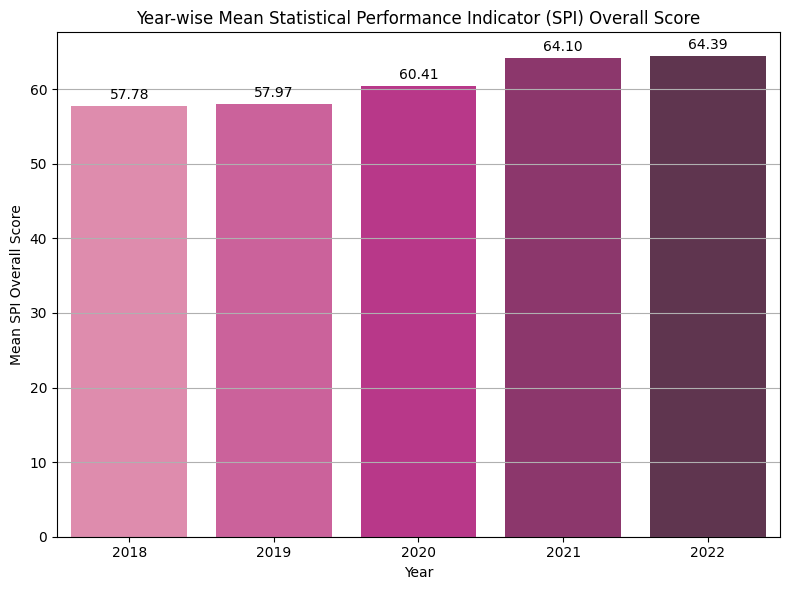

In [16]:

""".................................................Data Visualization..............................................."""

#1.To visualise the average Statistical performance Indicator Overall Score yearwise Bar graph is ploted
mean_scores = df.groupby('year')['SPI Overall Score'].mean().reset_index()
years = mean_scores['year'].astype(str)

plt.figure(figsize=(8, 6))
ax= sns.barplot(x='year', y='SPI Overall Score', data=mean_scores, palette='RdPu_d'
                                                                           '')
# Labeling and aesthetics
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', padding=3)
plt.xlabel('Year')
plt.ylabel('Mean SPI Overall Score')
plt.title('Year-wise Mean Statistical Performance Indicator (SPI) Overall Score')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()



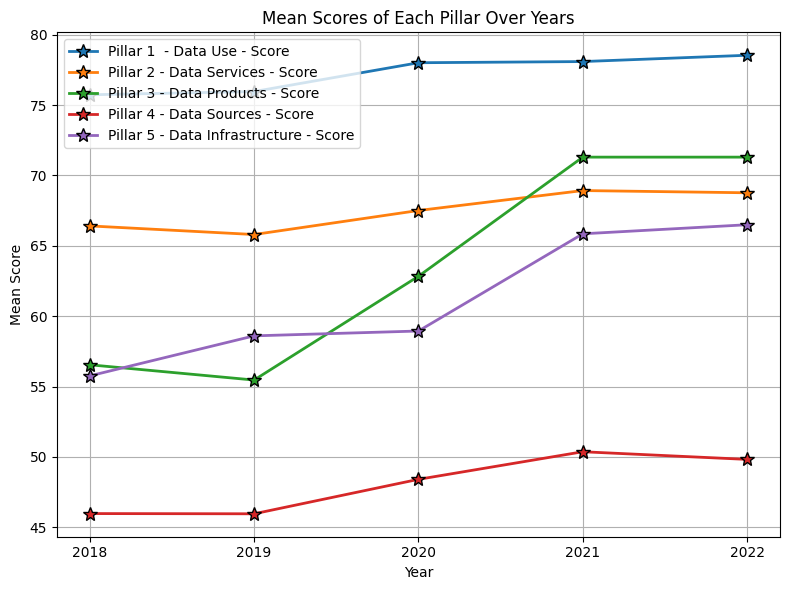

In [17]:
#2.To visualise the 5 pilliers score yearwise line graph is ploted
mean_scores = df.groupby('year')[['Pillar 1  - Data Use - Score',
                                  'Pillar 2 - Data Services - Score',
                                  'Pillar 3 - Data Products - Score',
                                  'Pillar 4 - Data Sources - Score',
                                  'Pillar 5 - Data Infrastructure - Score']].mean().reset_index()
years = mean_scores['year'].astype(str)
scores = mean_scores[['Pillar 1  - Data Use - Score',
                      'Pillar 2 - Data Services - Score',
                      'Pillar 3 - Data Products - Score',
                      'Pillar 4 - Data Sources - Score',
                      'Pillar 5 - Data Infrastructure - Score']].values

plt.figure(figsize=(8, 6))
colors = [ '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
pillars = ['Pillar 1  - Data Use - Score',
           'Pillar 2 - Data Services - Score',
           'Pillar 3 - Data Products - Score',
           'Pillar 4 - Data Sources - Score',
           'Pillar 5 - Data Infrastructure - Score']

for pillar, color in zip(pillars, colors):
    plt.plot(years, mean_scores[pillar], marker='*',ms=10,mec='black', label=pillar, color=color, linewidth=2)

# Labeling and aesthetics
plt.xlabel('Year')
plt.ylabel('Mean Score')
plt.title('Mean Scores of Each Pillar Over Years')
plt.xticks(years)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



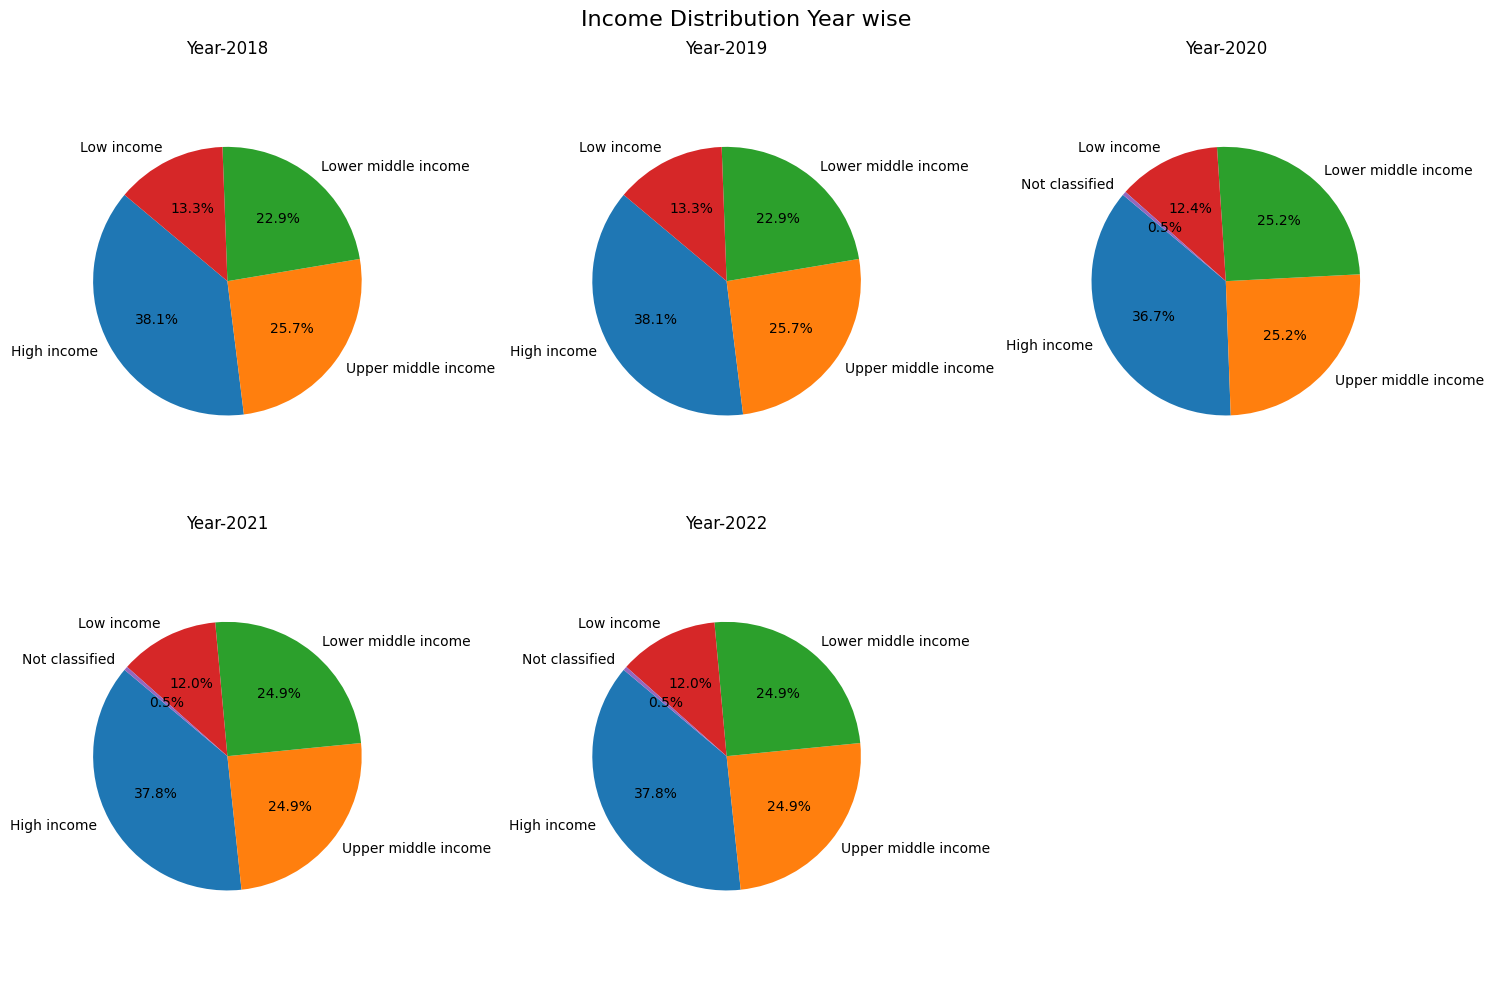

In [18]:
#3.To visualize the income of  diffrent countries yearwise in pie plot
#
# Round the 'year' column values
df['year'] = df['year'].round()

# Group by year and create a dictionary of DataFrames
dfs = {year: data for year, data in df.groupby('year')}


plt.figure(figsize=(15,10))
plt.suptitle('Income Distribution Year wise', fontsize=16)

years = sorted(df['year'].unique())
positions = [(2, 3, i + 1) for i in range(len(years))]

for i, (year, pos) in enumerate(zip(years, positions)):
    df_year = dfs.get(year, pd.DataFrame()).reset_index()
    count = df_year['income'].value_counts()

    plt.subplot(*pos)
    plt.pie(count, labels=count.index, autopct='%1.1f%%', startangle=140)
    plt.title(f'Year-{year}')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjusting the  subplot layout to prevent overlapping of pie charts
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1, wspace=0.4, hspace=0.4)
plt.tight_layout()
plt.show()



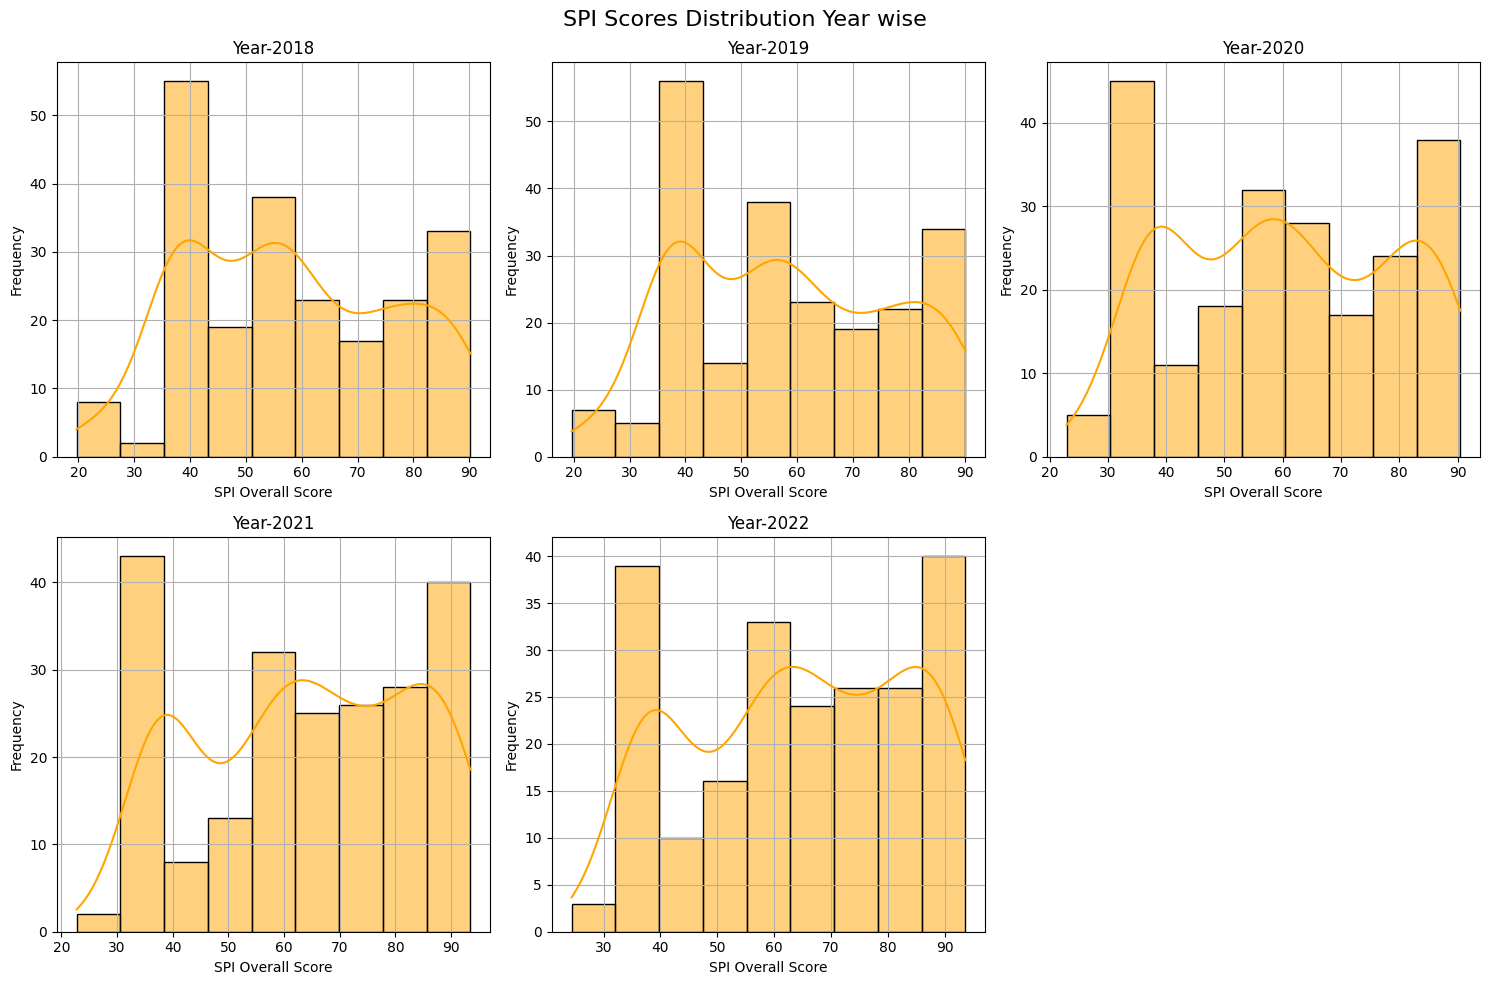

In [19]:
#4.To visualize the population year wise in histogram distribution plot and to check weather is normaly distributed

dfs = {year: data for year, data in df.groupby('year')}
years = sorted(df['year'].unique())
plt.figure(figsize=(15, 10))
plt.suptitle('SPI Scores Distribution Year wise', fontsize=16)
for i, year in enumerate(years):
    plt.subplot(2, 3, i + 1)  # Adjust the grid size as needed
    year_data = dfs[year]['SPI Overall Score']
    sns.histplot(year_data, kde=True, color="Orange")
    plt.title(f'Year-{year}')
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

Null Hypothesis (H0): There are no differences in the mean scores across the different pillars
Alternative Hypothesis (H1): There is at least one pillar with a mean score that is significantly different from the others.
F-statistic:237.953
P-value: 0.000


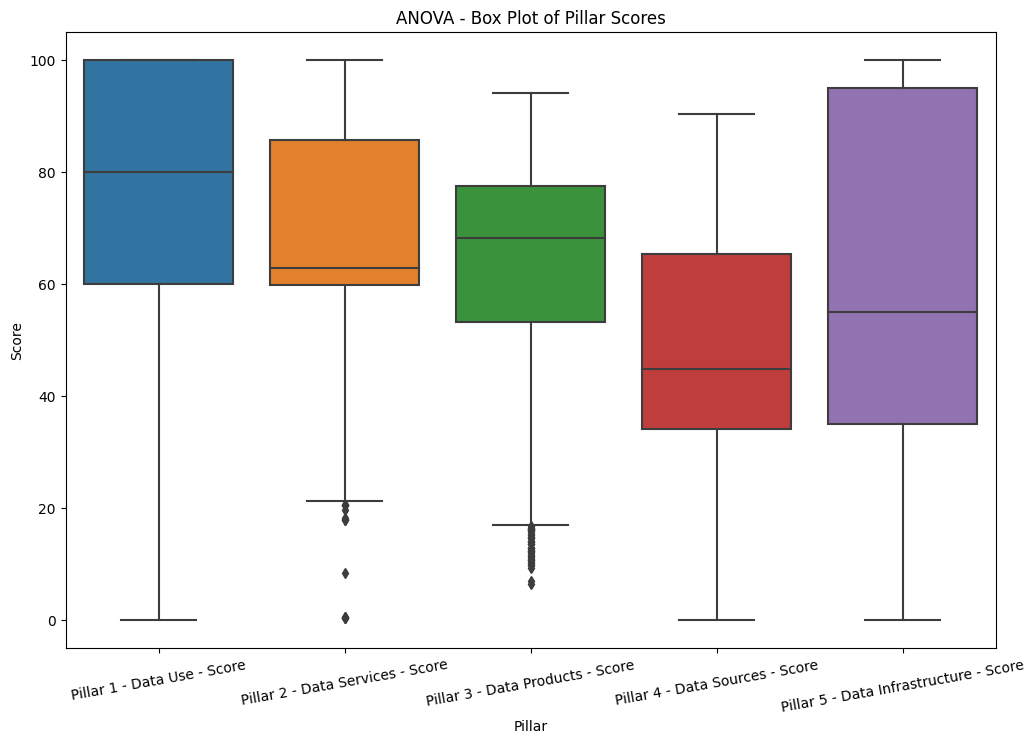

In [20]:
"""......................................Inferential Data Analysis..................................................."""

# 1.Analysis of Variance(ANOVA) For the 5 Pillars of Statistical Performance Indicators.


Pillars_1=df["Pillar 1  - Data Use - Score"]
Pillars_2=df["Pillar 2 - Data Services - Score"]
Pillars_3=df["Pillar 3 - Data Products - Score"]
Pillars_4=df["Pillar 4 - Data Sources - Score"]
Pillars_5=df["Pillar 5 - Data Infrastructure - Score"]

f_statistic, p_value = stats.f_oneway(Pillars_1, Pillars_2, Pillars_3, Pillars_4, Pillars_5)
print("Null Hypothesis (H0): There are no differences in the mean scores across the different pillars")
print("Alternative Hypothesis (H1): There is at least one pillar with a mean score that is significantly different from the others.")
print(f"F-statistic:{f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")


df_scores = pd.DataFrame({
    "Pillar": ["Pillar 1 - Data Use - Score"] * len(Pillars_1) +
              ["Pillar 2 - Data Services - Score"] * len(Pillars_2) +
              ["Pillar 3 - Data Products - Score"] * len(Pillars_3) +
              ["Pillar 4 - Data Sources - Score"] * len(Pillars_4) +
              ["Pillar 5 - Data Infrastructure - Score"] * len(Pillars_5),
    "Score": list(Pillars_1) + list(Pillars_2) + list(Pillars_3) + list(Pillars_4) + list(Pillars_5)
})

plt.figure(figsize=(12, 8))
sns.boxplot(x='Pillar', y='Score', data=df_scores)
plt.title('ANOVA - Box Plot of Pillar Scores')
plt.xticks(rotation=10)  # Rotate x labels if needed
plt.show()



Null Hypothesis (H₀):The null hypothesis states that there is no monotonic relationship between the income ranks and the population values
Alternative Hypothesis (H₁): The alternative hypothesis states that there is a monotonic relationship between the income ranks and the population values.
Spearman's rank correlation coefficient: 0.368
p-value: 0.000


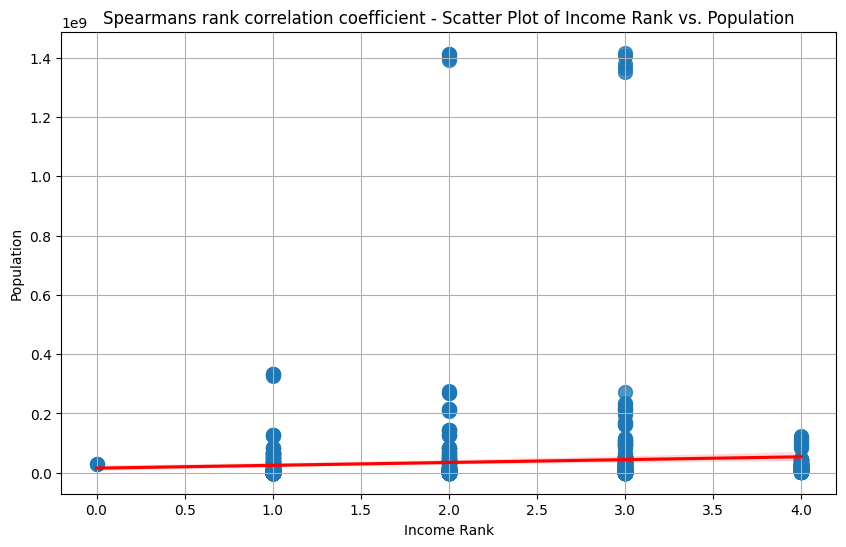

In [21]:
# 2.Spearman's rank correlation coefficient for categorical column Income and Numerical Colum Population.


# Convert Income Category to numeric ranks
df['income_Rank'] = df['income'].map({'Low income': 4,
                                      'Lower middle income': 3,
                                      'Upper middle income': 2,
                                      'High income': 1,
                                      'Not classified': 0})

# Calculate Spearman's rank correlation
corr, p_value = spearmanr(df['income_Rank'], df['population'])
print("Null Hypothesis (H₀):The null hypothesis states that there is no monotonic relationship between the income ranks and the population values")
print("Alternative Hypothesis (H₁): The alternative hypothesis states that there is a monotonic relationship between the income ranks and the population values.")

print(f'Spearman\'s rank correlation coefficient: {corr:.3f}')
print(f'p-value: {p_value:.3f}')

plt.figure(figsize=(10, 6))
# Scatter plot with regression line
sns.regplot(x='income_Rank', y='population', data=df, scatter_kws={'s':100}, line_kws={'color':'red'})
plt.title('Spearmans rank correlation coefficient - Scatter Plot of Income Rank vs. Population')
plt.xlabel('Income Rank')
plt.ylabel('Population')
plt.grid(True)
plt.show()



In [22]:
"""......................................Predictive Data Analysis..................................................."""

# Feature Enginerring  Dimensionality reduction Method
# Applying PCA for Factors of pillars

pillar_1_fact=["Dimension 1.5: Data use by international organizations",
               "Dimension 1.5: Data use by international organisations - Availability of Comparable Poverty headcount ratio at $2.15 a day",
               "Dimension 1.5: Data use by international organisations - Availability of Mortality rate, under-5 (per 1,000 live births) data meeting quality standards according to UN IGME",
               "Dimension 1.5: Data use by international organisations - Quality of Debt service data according to World Bank",
               "Dimension 1.5: Data use by international organisations - Safely Managed Drinking Water",
               "Dimension 1.5: Data use by international organisations - Labor force participation rate by sex and age (%)"
               ]
x = df[pillar_1_fact]
x = StandardScaler().fit_transform(x)
df['pillar_1_fact_PCA'] = PCA(n_components=1).fit_transform(x)

pillar_2_fact=["Dimension 2.1: Data Releases",
               "Dimension 2.2: Online access",
               "Dimension 2.4: Data services",
               "Dimension 2.1: Data releases - SDDS/e-GDDS subscription",
               "Dimension 2.2: Online access - Machine Readability Score",
               "Dimension 2.2: Online access - Non-Proprietary format Score",
               "Dimension 2.2: Online access - Download Options Score",
               "Dimension 2.2: Online access - Metadata Available Score",
               "Dimension 2.2: Online access - Terms of Use Score",
               "Dimension 2.2: Online access - ODIN Open Data Openness score",
               "Dimension 2.4: Data access services - NADA metadata"
               ]

x = df[pillar_2_fact]
x = StandardScaler().fit_transform(x)
df['pillar_2_fact_PCA'] = PCA(n_components=1).fit_transform(x)

pillar_3_fact=["Dimension 3.1: Social Statistics",
               "Dimension 3.2: Economic Statistics",
               "Dimension 3.3: Environmental Statistics",
               "Dimension 3.4: Institutional Statistics",
               "Dimension 3.1: SDG Goal 1 - GOAL 1: No Poverty",
               "Dimension 3.2: SDG Goal 2 - GOAL 2: Zero Hunger",
               "Dimension 3.3: SDG Goal 3 - GOAL 3: Good Health and Well-being",
               "Dimension 3.4: SDG Goal 4 - GOAL 4: Quality Education",
               "Dimension 3.5: SDG Goal 5 - GOAL 5: Gender Equality",
               "Dimension 3.6: SDG Goal 6 - GOAL 6: Clean Water and Sanitation",
               "Dimension 3.7: SDG Goal 7 - GOAL 7: Affordable and Clean Energy",
               "Dimension 3.8: SDG Goal 8 - GOAL 8: Decent Work and Economic Growth",
               "Dimension 3.9: SDG Goal 9 - GOAL 9: Industry, Innovation and Infrastructure",
               "Dimension 3.10: SDG Goal 10 - GOAL 10: Reduced Inequality",
               "Dimension 3.11: SDG Goal 11 - GOAL 11: Sustainable Cities and Communities",
               "Dimension 3.12: SDG Goal 12 - GOAL 12: Responsible Consumption and Production",
               "Dimension 3.13: SDG Goal 13 - GOAL 13: Climate Action",
               "Dimension 3.15: SDG Goal 15 - GOAL 15: Life on Land",
               "Dimension 3.16: SDG Goal 16 - GOAL 16: Peace and Justice Strong Institutions",
               "Dimension 3.17: SDG Goal 17 - GOAL 17: Partnerships to achieve the Goal"
               ]
x = df[pillar_3_fact]
x = StandardScaler().fit_transform(x)
df['pillar_3_fact_PCA'] = PCA(n_components=1).fit_transform(x)

pillar_4_fact=["Dimension 4.1: Censuses",
               "Dimension 4.1: Surveys",
               "Dimension 4.2: Administrative Data",
               "Dimension 4.3: Geospatial Data",
               "Dimension 4.1: censuses and surveys - Population & Housing census",
               "Dimension 4.1: censuses and surveys - Agriculture census",
               "Dimension 4.1: censuses and surveys - Business/establishment census",
               "Dimension 4.1: censuses and surveys - Household Survey on income, etc",
               "Dimension 4.1: censuses and surveys - Agriculture survey",
               "Dimension 4.1: censuses and surveys - Labor Force Survey",
               "Dimension 4.1: censuses and surveys - Health/Demographic survey",
               "Dimension 4.1: censuses and surveys - Business/establishment survey",
               "Dimension 4.2: administrative data - CRVS (WDI)",
               "Dimension 4.3: geospatial data - Geospatial data available at 1st Admin Level"
               ]
x = df[pillar_4_fact]
x = StandardScaler().fit_transform(x)
df['pillar_4_fact_PCA'] = PCA(n_components=1).fit_transform(x)

pillar_5_fact=["Dimension 5.1: Legislation and governance",
               "Dimension 5.2: Standards and Methods",
               "Dimension 5.5: Finance",
               "Dimension 5.1: Legislation and governance - Legislation Indicator based on PARIS21 indicators on SDG 17.18.2",
               "Dimension 5.2: standards - System of national accounts in use",
               "Dimension 5.2: standards - National Accounts base year",
               "Dimension 5.2: standards - Classification of national industry",
               "Dimension 5.2: standards - CPI base year",
               "Dimension 5.2: standards - Classification of household consumption",
               "Dimension 5.2: standards - Classification of status of employment",
               "Dimension 5.2: standards - Central government accounting status",
               "Dimension 5.2: standards - Compilation of government finance statistics",
               "Dimension 5.2: standards - Compilation of monetary and financial statistics",
               "Dimension 5.2: standards - Business process",
               "Dimension 5.5: Finance - Finance Indicator based on PARIS21 indicators on SDG 17.18.3 & SDG 17.19.1"
               ]
x = df[pillar_5_fact]
x = StandardScaler().fit_transform(x)
df['pillar_5_fact_PCA'] = PCA(n_components=1).fit_transform(x)


Best estimator of Linear Regression Grid Search: LinearRegression()
Training MSE : 27.843957415082084
Testing MSE : 16.543668247350148
.................................................................................................
Best estimator of Ridge Regression Grid Search: Ridge(alpha=10.0)
Training MSE : 27.84450131994544
Testing MSE : 16.53535671461469
.................................................................................................
Best estimator of lasso Regression Grid Search: Lasso(alpha=0.1)
Training MSE : 27.847446808889146
Testing MSE : 16.59195753128287
.................................................................................................
Best estimator of Decision Tree Regression Grid Search: DecisionTreeRegressor()
Training MSE : 1.6016596586004544e-29
Testing MSE : 13.714371349142073
.................................................................................................
Best estimator of Random Forest Regression Grid Search: Rand

<Figure size 2000x1800 with 0 Axes>

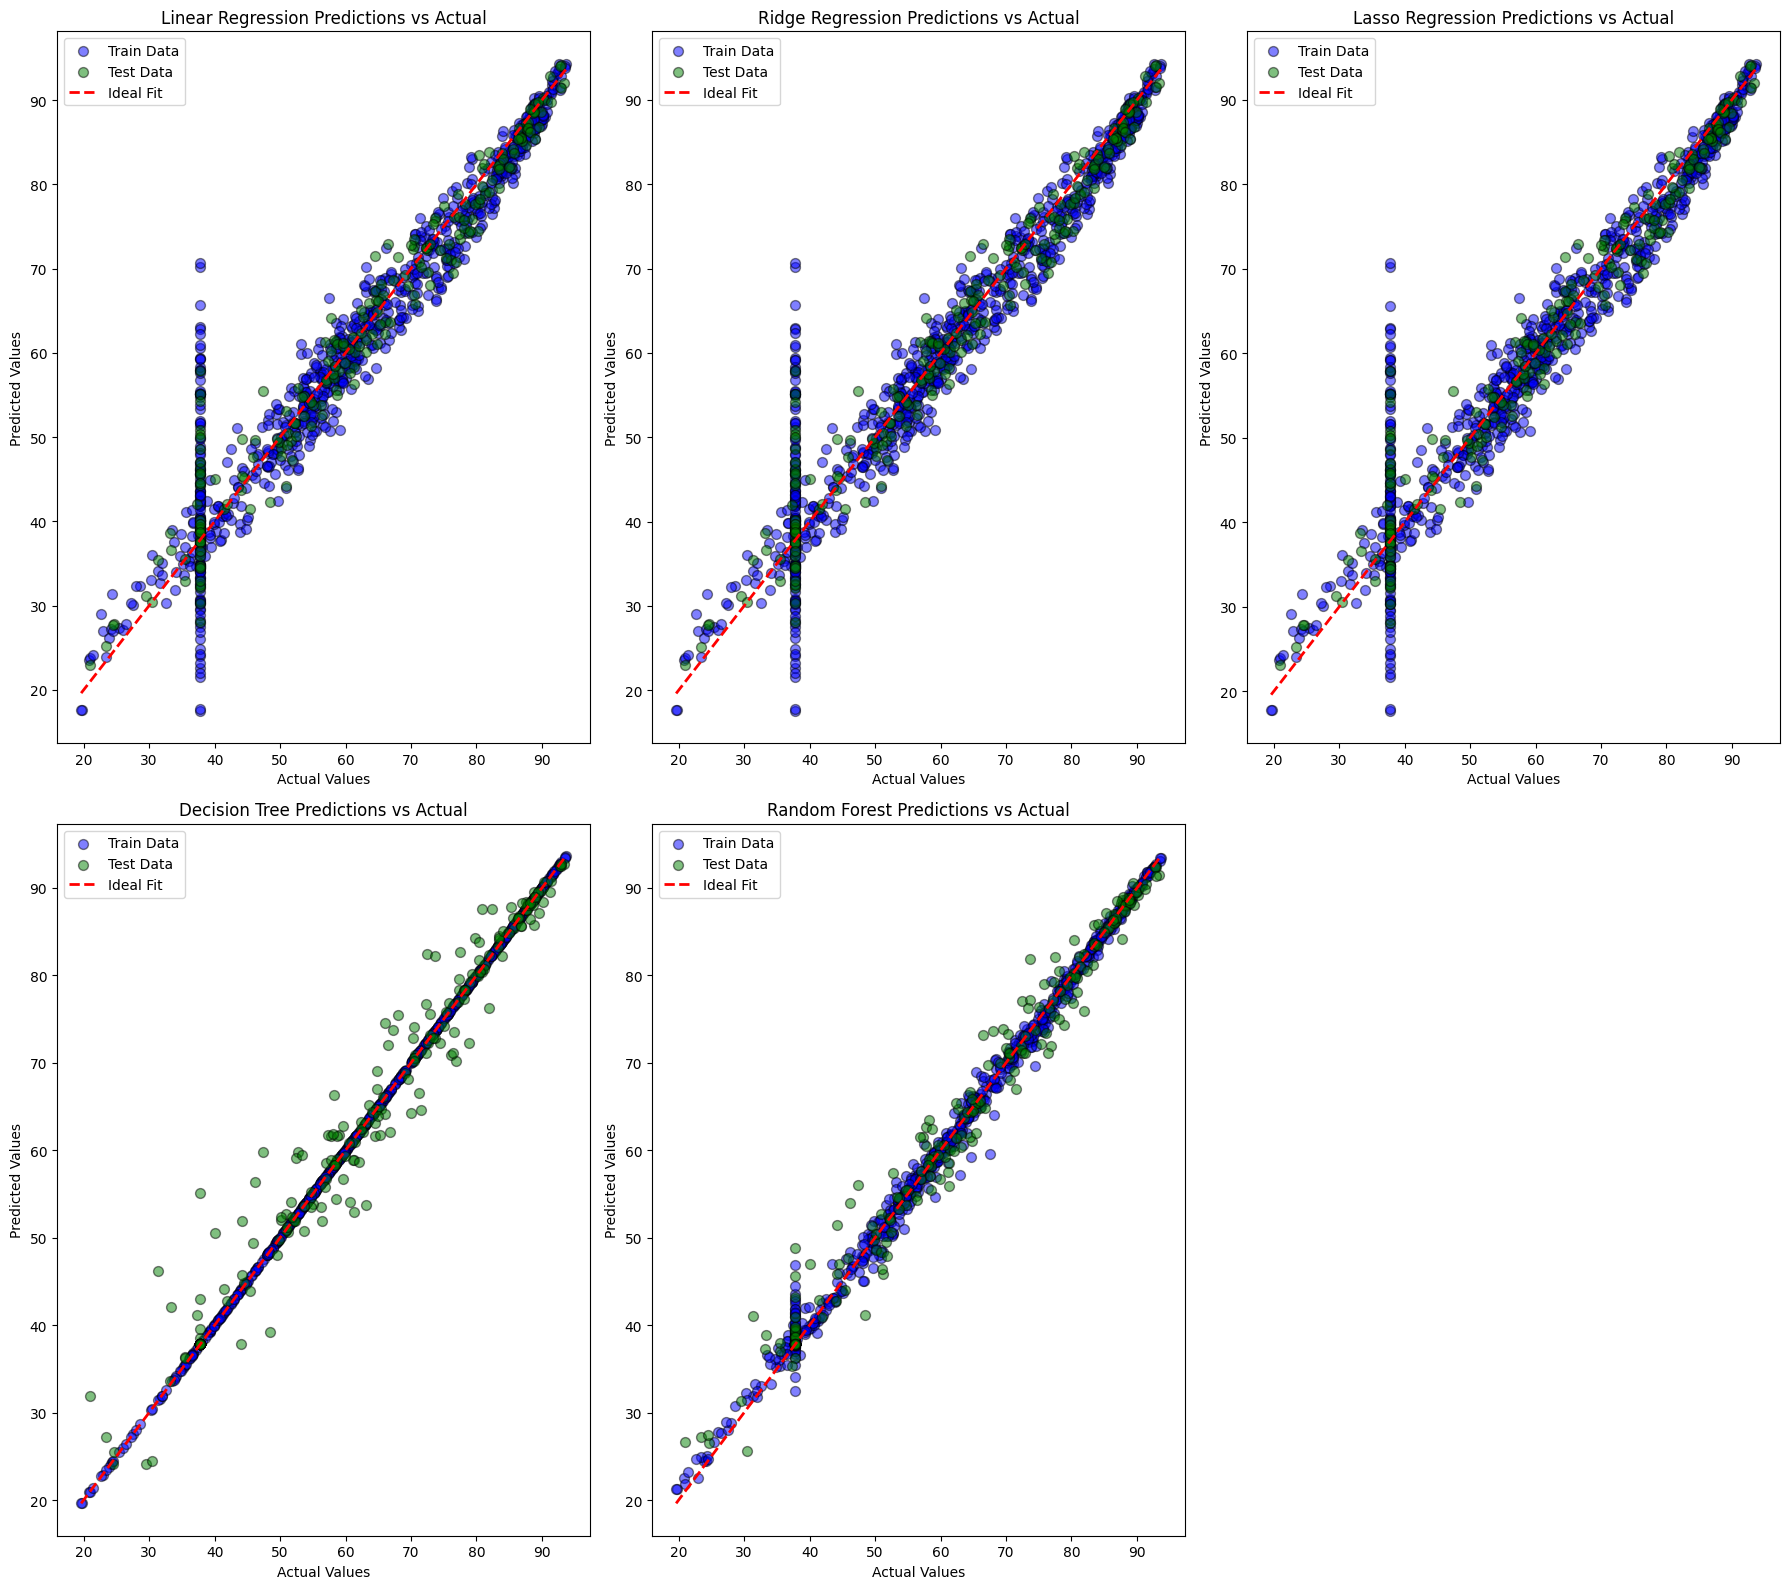

In [23]:

"""...............................Supervised Machine Learning Algorithm Regression................................."""


x=df[['pillar_1_fact_PCA','pillar_2_fact_PCA','pillar_3_fact_PCA','pillar_4_fact_PCA','pillar_5_fact_PCA']]
y=df['SPI Overall Score']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


"""..............................................Linear Regression............................................."""

lr_model=LinearRegression()
param_grid = {"fit_intercept": [True, False]}

grid_search=GridSearchCV(lr_model,param_grid,cv=5,scoring="neg_mean_squared_error")
grid_search.fit(x_train,y_train)

best_estimator_lr = grid_search.best_estimator_
train_predictions = best_estimator_lr.predict(x_train)
test_predictions = best_estimator_lr.predict(x_test)

# Calculation of Performance metrics and checking for overfitting/underfitting
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best estimator of Linear Regression Grid Search:", best_estimator_lr)
print("Training MSE :", train_mse)
print("Testing MSE :", test_mse)
plt.figure(figsize=(20, 18))

""".................................................Ridge and Lasso Regression................................................................."""

print(".................................................................................................")
ridge_model = Ridge(alpha=1.0)  # Alpha is the regularization strength
param_grid = {"alpha": [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(ridge_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)


best_estimator_ridge = grid_search.best_estimator_
train_predictions = best_estimator_ridge.predict(x_train)
test_predictions = best_estimator_ridge.predict(x_test)

# Calculation of Performance metrics and checking for overfitting/underfitting
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best estimator of Ridge Regression Grid Search:", best_estimator_ridge)
print("Training MSE :", train_mse)
print("Testing MSE :", test_mse)

print(".................................................................................................")
lasso_model = Lasso(alpha=1.0)  # Alpha is the regularization strength
param_grid = {"alpha": [0.1, 1.0, 10.0]}

grid_search = GridSearchCV(lasso_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)


best_estimator_lasso = grid_search.best_estimator_
train_predictions = best_estimator_lasso.predict(x_train)
test_predictions = best_estimator_lasso.predict(x_test)

# Calculation of Performance metrics and checking for overfitting/underfitting
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best estimator of lasso Regression Grid Search:", best_estimator_lasso)
print("Training MSE :", train_mse)
print("Testing MSE :", test_mse)

# """...........................................Decision Tree Regressor............................................."""
print(".................................................................................................")

tree_model = DecisionTreeRegressor()
param_grid = {
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid_search = GridSearchCV(tree_model, param_grid, cv=5, scoring="neg_mean_squared_error")
grid_search.fit(x_train, y_train)


best_estimator_tree = grid_search.best_estimator_
train_predictions = best_estimator_tree.predict(x_train)
test_predictions = best_estimator_tree.predict(x_test)

# Calculation of Performance metrics and checking for overfitting/underfitting
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best estimator of Decision Tree Regression Grid Search:", best_estimator_tree)
print("Training MSE :", train_mse)
print("Testing MSE :", test_mse)


"""................................................Random Forest Regressor..........................................."""

print(".................................................................................................")
rf_model = RandomForestRegressor(random_state=42)

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(x_train, y_train)

best_estimator_rf = grid_search.best_estimator_
train_predictions = best_estimator_rf.predict(x_train)
test_predictions = best_estimator_rf.predict(x_test)

# Calculation of Performance metrics and checking for overfitting/underfitting
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print("Best estimator of Random Forest Regression Grid Search:", best_estimator_rf)
print("Training MSE :", train_mse)
print("Testing MSE :", test_mse)


def plot_predictions_vs_actual(y_true_train, y_pred_train, y_true_test, y_pred_test, title, ax):
    # Plot training data
    ax.scatter(y_true_train, y_pred_train, alpha=0.5, edgecolors='k', color='blue', label='Train Data', s=50)

    # Plot testing data
    ax.scatter(y_true_test, y_pred_test, alpha=0.5, edgecolors='k', color='green', label='Test Data', s=50)

    # Plot the ideal line (y = x)
    min_val = min(y_true_train.min(), y_true_test.min())
    max_val = max(y_true_train.max(), y_true_test.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Ideal Fit')

    ax.set_title(title)
    ax.set_xlabel('Actual Values')
    ax.set_ylabel('Predicted Values')
    ax.legend()


def plot_all_predictions(y_train, x_train, y_test, x_test, estimators):
    fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(18, 16))
    axs = axs.flatten()  # Flatten the 2D array of axes into a 1D array for easy iteration

    # List of model names and corresponding predictors
    model_names = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'Decision Tree', 'Random Forest']

    for i, (model_name, estimator) in enumerate(estimators.items()):
        plot_predictions_vs_actual(
            y_train, estimator.predict(x_train),
            y_test, estimator.predict(x_test),
            f'{model_name} Predictions vs Actual',
            axs[i]
        )

    # Turn off the last subplot if there are fewer plots
    if len(estimators) < len(axs):
        for j in range(len(estimators), len(axs)):
            axs[j].axis('off')

    plt.tight_layout()
    plt.show()


# Example usage
estimators = {
    'Linear Regression': best_estimator_lr,
    'Ridge Regression': best_estimator_ridge,
    'Lasso Regression': best_estimator_lasso,
    'Decision Tree': best_estimator_tree,
    'Random Forest': best_estimator_rf
}

plot_all_predictions(y_train, x_train, y_test, x_test, estimators)

.................................................................................................
Best estimator of Logistic Regression Grid Search: LogisticRegression(C=0.0001, max_iter=300, multi_class='multinomial',
                   solver='saga')
Training Accuracy : 0.3724137931034483
Testing Accuracy : 0.41284403669724773
Classification Report for Test Data:
                      precision    recall  f1-score   support

        High income       0.42      1.00      0.59        89
         Low income       0.00      0.00      0.00        32
Lower middle income       0.20      0.02      0.04        43
Upper middle income       0.00      0.00      0.00        54

           accuracy                           0.41       218
          macro avg       0.15      0.26      0.16       218
       weighted avg       0.21      0.41      0.25       218



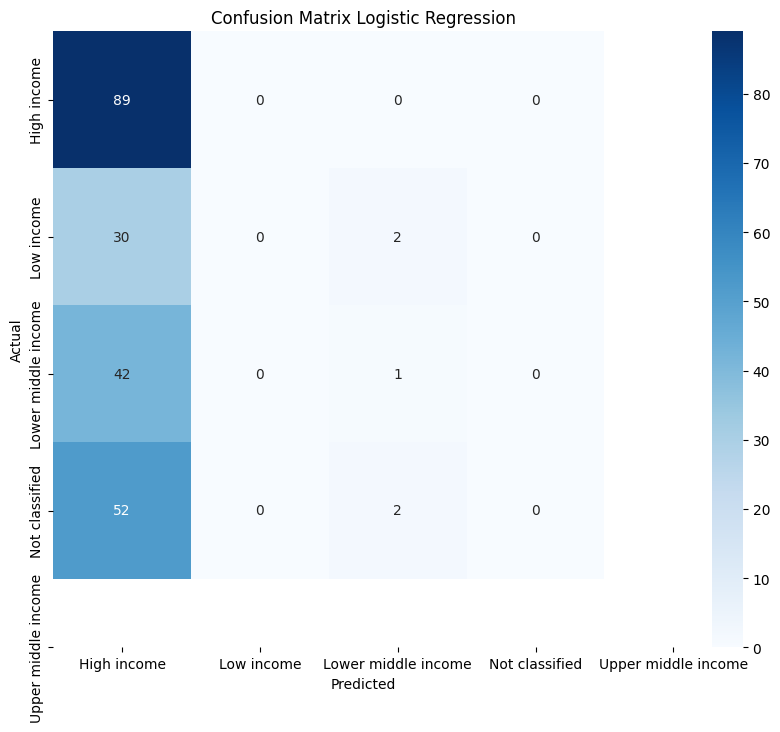

.................................................................................................
Best estimator of Logistic Regression Grid Search: DecisionTreeClassifier(max_depth=10)
Training Accuracy : 0.7333333333333333
Testing Accuracy : 0.536697247706422
Classification Report for Test Data:
                      precision    recall  f1-score   support

        High income       0.78      0.74      0.76        89
         Low income       0.53      0.25      0.34        32
Lower middle income       0.36      0.67      0.47        43
     Not classified       0.00      0.00      0.00         0
Upper middle income       0.38      0.26      0.31        54

           accuracy                           0.54       218
          macro avg       0.41      0.39      0.38       218
       weighted avg       0.56      0.54      0.53       218



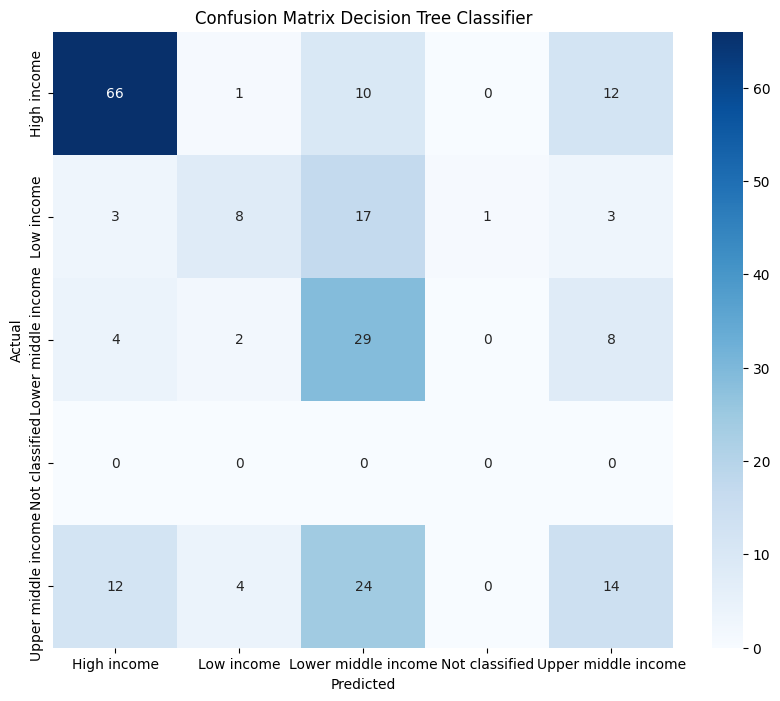

.................................................................................................
Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Random Forest Model: RandomForestClassifier(max_depth=10, min_samples_split=20)
Training Accuracy: 0.6448275862068965
Testing Accuracy: 0.5412844036697247
Classification Report for Test Data:
                      precision    recall  f1-score   support

        High income       0.83      0.75      0.79        89
         Low income       0.50      0.22      0.30        32
Lower middle income       0.35      0.65      0.46        43
Upper middle income       0.37      0.30      0.33        54

           accuracy                           0.54       218
          macro avg       0.51      0.48      0.47       218
       weighted avg       0.57      0.54      0.54       218



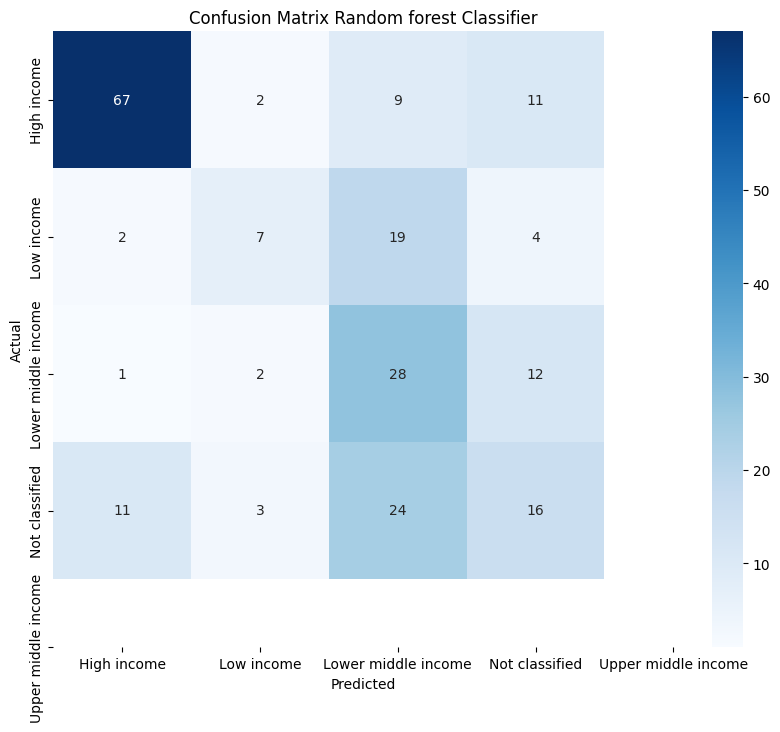

...............................................................................................................
Support Vector Machine Model:
Training Accuracy: 0.5298850574712644
Testing Accuracy: 0.5504587155963303
Classification Report for Test Data:
                      precision    recall  f1-score   support

        High income       0.74      0.78      0.76        89
         Low income       0.00      0.00      0.00        32
Lower middle income       0.35      0.67      0.46        43
Upper middle income       0.52      0.41      0.46        54

           accuracy                           0.55       218
          macro avg       0.40      0.46      0.42       218
       weighted avg       0.50      0.55      0.51       218



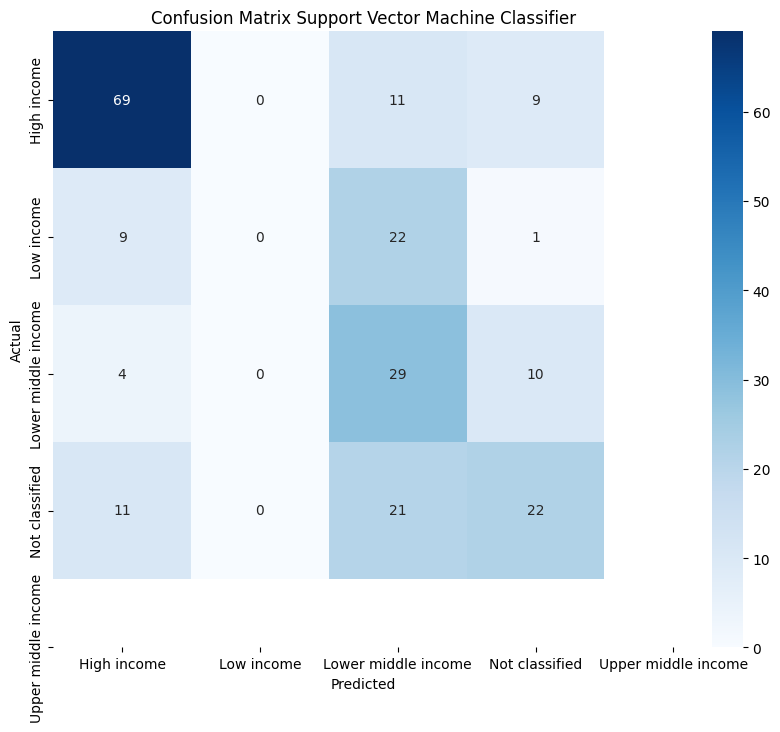

.................................................................................................
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Gaussian Naive Bayes Model: GaussianNB()
Training Accuracy: 0.47701149425287354
Testing Accuracy: 0.4724770642201835
Classification Report for Test Data:
                      precision    recall  f1-score   support

        High income       0.54      0.89      0.67        89
         Low income       0.00      0.00      0.00        32
Lower middle income       0.33      0.56      0.42        43
Upper middle income       0.00      0.00      0.00        54

           accuracy                           0.47       218
          macro avg       0.22      0.36      0.27       218
       weighted avg       0.29      0.47      0.36       218



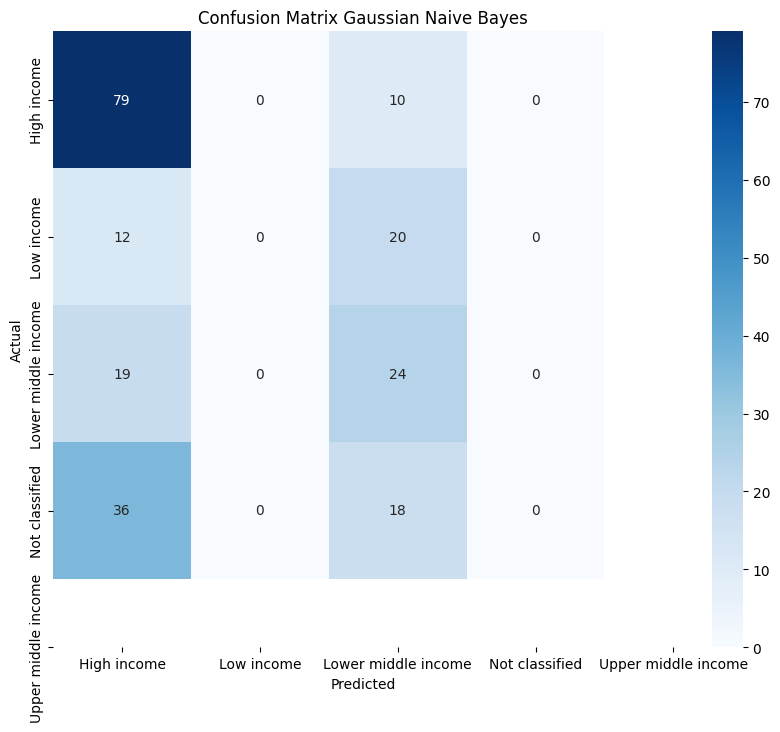

In [24]:

"""..............................................Logistic Regression............................................."""

print(".................................................................................................")
lc_model = LogisticRegression(multi_class="multinomial", max_iter=300)
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l2'],  # Only 'l2' is compatible with 'lbfgs' and 'newton-cg'
    'solver': ['lbfgs', 'saga', 'newton-cg'],  # Compatible solvers for 'multinomial'
}

grid_search=GridSearchCV(lc_model,param_grid,cv=5,scoring="accuracy")
grid_search.fit(x_train,y_train)

best_estimator = grid_search.best_estimator_
train_predictions = best_estimator.predict(x_train)
test_predictions = best_estimator.predict(x_test)

# Calculate and store accuracies
train_accuracy_logistic = accuracy_score(y_train, train_predictions)
test_accuracy_logistic = accuracy_score(y_test, test_predictions)


print("Best estimator of Logistic Regression Grid Search:", best_estimator)
print("Training Accuracy :", train_accuracy_logistic)
print("Testing Accuracy :", test_accuracy_logistic)
print("Classification Report for Test Data:\n", classification_report(y_test, test_predictions))
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=Encoder_label.classes_, yticklabels=Encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Logistic Regression')
plt.show()


""".........................................Decision Tree Classifier................................................."""

print(".................................................................................................")
decision_tree = DecisionTreeClassifier()
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search=GridSearchCV(decision_tree,param_grid,cv=5,scoring="accuracy")
grid_search.fit(x_train,y_train)


best_estimator = grid_search.best_estimator_
train_predictions = best_estimator.predict(x_train)
test_predictions = best_estimator.predict(x_test)

# Calculate and store accuracies
train_accuracy_logistic = accuracy_score(y_train, train_predictions)
test_accuracy_logistic = accuracy_score(y_test, test_predictions)

print("Best estimator of Logistic Regression Grid Search:", best_estimator)
print("Training Accuracy :", train_accuracy_logistic)
print("Testing Accuracy :", test_accuracy_logistic)
print("Classification Report for Test Data:\n", classification_report(y_test, test_predictions))
# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=Encoder_label.classes_, yticklabels=Encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Decision Tree Classifier')
plt.show()

"""...............................................Random Forest Classifier..........................................."""

print(".................................................................................................")
rf_model = RandomForestClassifier()
param_grid = {
    'n_estimators': [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
     "min_samples_split": [2, 10, 20],
     "min_samples_leaf": [1, 5, 10]}

grid_search=GridSearchCV(rf_model,param_grid, cv=5, scoring="accuracy", verbose=1)
grid_search.fit(x_train,y_train)

best_estimator = grid_search.best_estimator_
train_predictions = best_estimator.predict(x_train)
test_predictions = best_estimator.predict(x_test)

# Calculate and store accuracies
train_accuracy_rf = accuracy_score(y_train, train_predictions)
test_accuracy_rf = accuracy_score(y_test, test_predictions)


print("Best Random Forest Model:", best_estimator)
print("Training Accuracy:", train_accuracy_rf)
print("Testing Accuracy:", test_accuracy_rf)
print("Classification Report for Test Data:\n", classification_report(y_test, test_predictions))

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=Encoder_label.classes_, yticklabels=Encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Random forest Classifier')
plt.show()


""".....................................Support Vector Machines (SVM): ..........................................."""

print("...............................................................................................................")

svm_model = SVC()

# Fit the best model on the entire training data
best_svm_model=svm_model.fit(x_train, y_train)

# Make predictions
train_predictions = best_svm_model.predict(x_train)
test_predictions = best_svm_model.predict(x_test)

# Calculate and store accuracies
train_accuracy_svm = accuracy_score(y_train, train_predictions)
test_accuracy_svm = accuracy_score(y_test, test_predictions)

# Print results
print("Support Vector Machine Model:")
print("Training Accuracy:", train_accuracy_svm)
print("Testing Accuracy:", test_accuracy_svm)
print("Classification Report for Test Data:\n", classification_report(y_test, test_predictions))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=Encoder_label.classes_, yticklabels=Encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Support Vector Machine Classifier')
plt.show()

"""..................................................Naive Bayes ...................................................."""
print(".................................................................................................")
gnb_model = GaussianNB()
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}
grid_search = GridSearchCV(estimator=gnb_model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(x_train, y_train)
best_estimator = grid_search.best_estimator_
# Get the best model
best_gnb_model = grid_search.best_estimator_

# Make predictions
train_predictions = best_gnb_model.predict(x_train)
test_predictions = best_gnb_model.predict(x_test)

# Calculate and store accuracies
train_accuracy_gnb = accuracy_score(y_train, train_predictions)
test_accuracy_gnb = accuracy_score(y_test, test_predictions)
# Print results
print("Best Gaussian Naive Bayes Model:", best_estimator)
print("Training Accuracy:", train_accuracy_gnb)
print("Testing Accuracy:", test_accuracy_gnb)
print("Classification Report for Test Data:\n", classification_report(y_test, test_predictions))

# Compute and plot confusion matrix
conf_matrix = confusion_matrix(y_test, test_predictions)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=Encoder_label.classes_, yticklabels=Encoder_label.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Gaussian Naive Bayes')
plt.show()
